In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

alpha,sigma = 1,1
beta = [1, 2.5]

size = 100

X1 = np.linspace(0,1,size)
X2 = np.linspace(0,0.2,size)

Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

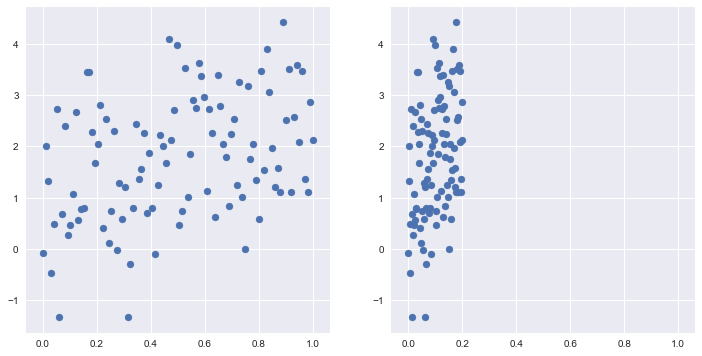

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True)
axes[0].scatter(X1,Y)
axes[1].scatter(X2,Y)
plt.show()

In [3]:
from pymc3 import Model, Normal, HalfNormal
basic_model = Model()

with basic_model:
    
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)
    
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [4]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)
map_estimate

Optimization terminated successfully.
         Current function value: 164.379479
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17


{'alpha': array(1.01366409),
 'beta': array([1.46791597, 0.29358319]),
 'sigma_log_': array(0.11928769)}

In [5]:
from scipy import optimize

map_estimate = find_MAP(model=basic_model, fmin=optimize.fmin_powell)
map_estimate

Optimization terminated successfully.
         Current function value: 164.380110
         Iterations: 6
         Function evaluations: 271


{'alpha': array(1.01755221),
 'beta': array([1.51426781, 0.03520891]),
 'sigma_log_': array(0.11815107)}

In [20]:
from pymc3 import NUTS, sample

with basic_model:
    start = find_MAP(fmin=optimize.fmin_powell)
    step = NUTS(scaling=start)
    trace = sample(2000, step, start=start)

Optimization terminated successfully.
         Current function value: 164.380110
         Iterations: 6
         Function evaluations: 271


100%|██████████████████████████████████████| 2000/2000 [00:20<00:00, 97.34it/s]


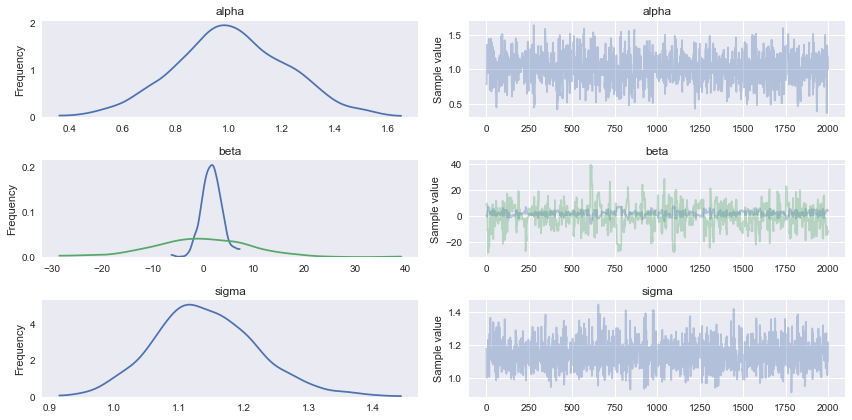

In [24]:
from pymc3 import traceplot

traceplot(trace)
plt.show()